In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Didikoglu, Altug; Lucas, Robert J; Brown, Timothy M (2023). Data: Associations between light exposure and sleep timing and sleepiness while awake in a sample of UK adults in everyday life. University of Manchester. Dataset. https://doi.org/10.48420/23786238.v1

In [2]:
baseline = pd.read_csv("Data/Didikoglu_et_al_2023_PNAS_baseline.csv")
kss = pd.read_csv("Data/Didikoglu_et_al_2023_PNAS_kss.csv")
light = pd.read_csv("Data/Didikoglu_et_al_2023_PNAS_light_exposure.csv")
sleep = pd.read_csv("Data/Didikoglu_et_al_2023_PNAS_kss.csv")

In [3]:
baseline.head()

,id,age,sex,caffeineGeneralUnit,smokeGeneralUnit,alcoholGeneralFreq,healthSubjRate,chronotypeSubjRate,PSQItotalScore,MCTQmsfsc,IPAQactivityCategory
0,1,26-30,Male,4.0,Never,Special occasions,very good,Rather more an evening type than a morning type,3,6.303571,Moderate
1,2,26-30,Female,4.0,Never,Special occasions,very good,Definitely a morning type,7,4.750000,Moderate
2,3,51-55,Male,4.0,Never,1-2 in a week,very good,Rather more a morning type than an evening type,4,3.166667,Moderate
3,4,31-35,Male,3.0,Never,Never,good,Rather more a morning type than an evening type,4,4.482143,Moderate
4,5,36-40,Female,3.0,Never,3-4 in a week,very good,Definitely an evening type,4,5.660714,High


In [4]:
baseline.shape

(59, 11)

In [5]:
baseline.isnull().sum()

id                      0
age                     0
sex                     0
caffeineGeneralUnit     1
smokeGeneralUnit        0
alcoholGeneralFreq      0
healthSubjRate          0
chronotypeSubjRate      0
PSQItotalScore          0
MCTQmsfsc               0
IPAQactivityCategory    0
dtype: int64

In [6]:
kss.head()

,id,datatime,timeofday,timeawake,kss
0,1,2022-02-21 12:43:15,12.717,5.217,3
1,1,2022-02-21 12:45:30,12.750,5.250,3
2,1,2022-02-21 14:08:10,14.133,6.633,4
3,1,2022-02-21 15:19:15,15.317,7.817,5
4,1,2022-02-21 17:06:15,17.100,9.600,6


In [7]:
kss.shape

(1799, 5)

In [8]:
kss.isnull().sum()

id            0
datatime      0
timeofday     0
timeawake    18
kss           0
dtype: int64

In [9]:
light.head()

,id,datatime,SconeopicEDI,MelanopicEDI,RodopicEDI,MconeopicEDI,LconeopicEDI,PhotopicLux
0,1,2022-02-21 12:33:00,259.933986,369.341318,357.840096,505.974584,551.385621,562.721928
1,1,2022-02-21 12:33:30,48.984336,74.719314,73.987286,110.303445,119.310881,120.018312
2,1,2022-02-21 12:34:00,148.126443,159.488825,109.944697,115.173327,94.927285,132.861370
3,1,2022-02-21 12:34:30,23.922818,167.329340,280.754992,488.708210,616.006479,532.385790
4,1,2022-02-21 12:35:00,360.207330,493.142531,455.501441,625.170105,668.800388,701.371976


In [10]:
light.shape

(1206093, 8)

In [11]:
light.isnull().sum()

id              0
datatime        0
SconeopicEDI    0
MelanopicEDI    0
RodopicEDI      0
MconeopicEDI    0
LconeopicEDI    0
PhotopicLux     0
dtype: int64

In [12]:
sleep.head()

,id,datatime,timeofday,timeawake,kss
0,1,2022-02-21 12:43:15,12.717,5.217,3
1,1,2022-02-21 12:45:30,12.750,5.250,3
2,1,2022-02-21 14:08:10,14.133,6.633,4
3,1,2022-02-21 15:19:15,15.317,7.817,5
4,1,2022-02-21 17:06:15,17.100,9.600,6


In [13]:
sleep.shape

(1799, 5)

In [14]:
sleep.isnull().sum()

id            0
datatime      0
timeofday     0
timeawake    18
kss           0
dtype: int64

In [15]:
light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206093 entries, 0 to 1206092
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1206093 non-null  int64  
 1   datatime      1206093 non-null  object 
 2   SconeopicEDI  1206093 non-null  float64
 3   MelanopicEDI  1206093 non-null  float64
 4   RodopicEDI    1206093 non-null  float64
 5   MconeopicEDI  1206093 non-null  float64
 6   LconeopicEDI  1206093 non-null  float64
 7   PhotopicLux   1206093 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 73.6+ MB


In [16]:
light['datatime'] = pd.to_datetime(light['datatime'], format='mixed', errors='coerce')

In [17]:
print(light['datatime'].isna().sum())

0


In [18]:
light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206093 entries, 0 to 1206092
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   id            1206093 non-null  int64         
 1   datatime      1206093 non-null  datetime64[ns]
 2   SconeopicEDI  1206093 non-null  float64       
 3   MelanopicEDI  1206093 non-null  float64       
 4   RodopicEDI    1206093 non-null  float64       
 5   MconeopicEDI  1206093 non-null  float64       
 6   LconeopicEDI  1206093 non-null  float64       
 7   PhotopicLux   1206093 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 73.6 MB


In [19]:
light.head(2)

,id,datatime,SconeopicEDI,MelanopicEDI,RodopicEDI,MconeopicEDI,LconeopicEDI,PhotopicLux
0,1,2022-02-21 12:33:00,259.933986,369.341318,357.840096,505.974584,551.385621,562.721928
1,1,2022-02-21 12:33:30,48.984336,74.719314,73.987286,110.303445,119.310881,120.018312


convert light_exposure dataset time to timeofday, like in kss dataset timeofday

In [20]:
def add_time_of_day_column(df, datetime_column):
    # Make sure the column is in datetime format
    df[datetime_column] = pd.to_datetime(df[datetime_column])
    
    # Function to convert time to decimal hours
    def time_to_decimal(t):
        return round(t.hour + t.minute / 60 + t.second / 3600, 3)

    # Apply the conversion
    df['timeofday'] = df[datetime_column].dt.time.apply(time_to_decimal)
    
    return df

In [21]:
light = add_time_of_day_column(light, 'datatime')

remove PhotopicLux values for match indoor/daylight lighting.
100 > PhotopicLux means dim room and PhotopicLux > 20000 means xtreme sunlight

In [22]:
light = light[light['PhotopicLux'] > 100]
light = light[light['PhotopicLux'] > 20000]

make melanopic_ratio inside useful biological range ( 0.3 - 1.2 )

In [23]:
light['mel_ratio'] = light['MelanopicEDI'] / light['PhotopicLux']
light['mel_ratio'] = light['mel_ratio'].clip(lower=0.3, upper=1.2)

In [24]:
mel_min = light['mel_ratio'].min()
mel_max = light['mel_ratio'].max()

print(f"Minimum melanopic_ratio: {mel_min:.3f}")
print(f"Maximum melanopic_ratio: {mel_max:.3f}")

Minimum melanopic_ratio: 0.300
Maximum melanopic_ratio: 1.200


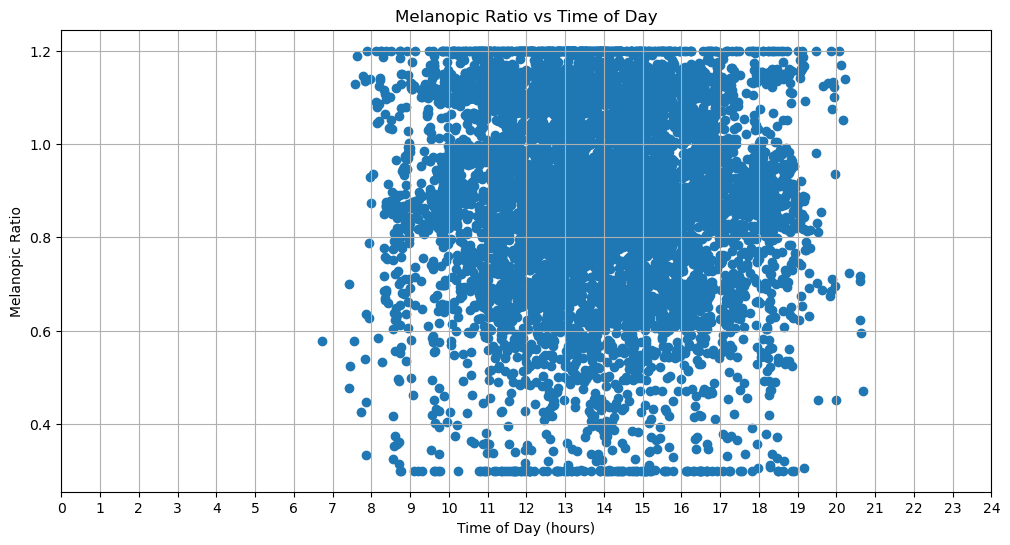

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(light['timeofday'], light['mel_ratio'])
plt.title('Melanopic Ratio vs Time of Day')
plt.xlabel('Time of Day (hours)')
plt.ylabel('Melanopic Ratio')
plt.xticks(range(0, 25))
plt.grid(True)
plt.show()

calculate CCT values according to standard LED CCT values and typical melanopic ratio <br>
<img src="mceclip2.png" alt="CCT-MR" width="300">

In [26]:
# Estimate CCT from ratio

# Known points from your uploaded chart
melanopic_ratios = np.array([0.399, 0.442, 0.525, 0.631, 0.668, 0.836, 0.976])
cct_values = np.array([2400, 2700, 3000, 3500, 4000, 5000, 6500])

# Build interpolation function
mel_ratio_to_cct = interp1d(melanopic_ratios, cct_values, kind='linear', fill_value='extrapolate')

In [27]:
light['CCT_estimated'] = mel_ratio_to_cct(light['mel_ratio'])

In [28]:
light.head(30)

,id,datatime,SconeopicEDI,MelanopicEDI,RodopicEDI,MconeopicEDI,LconeopicEDI,PhotopicLux,timeofday,mel_ratio,CCT_estimated
356,1,2022-02-21 15:31:00,27926.025642,43881.563165,48434.005083,45744.219834,52134.093330,54075.810546,15.517,0.811482,4854.061315
362,1,2022-02-21 15:34:00,18501.240930,28838.500261,30270.568250,29052.457214,31886.234236,34960.619901,15.567,0.824885,4933.840872
365,1,2022-02-21 15:35:30,13026.014420,20335.252918,23708.927499,22183.888204,26120.266685,25948.632163,15.592,0.783673,4688.532172
368,1,2022-02-21 15:37:00,15206.736581,22308.811877,24575.163670,22555.316594,25863.483123,26348.641201,15.617,0.846678,5114.405940
391,1,2022-02-21 15:48:30,14804.403877,23312.002725,25443.692766,23937.303715,27045.528415,28644.996086,15.808,0.813825,4868.003622
392,1,2022-02-21 15:49:00,18054.281299,27348.776817,29122.808292,27120.840298,30303.713969,32213.690002,15.817,0.848980,5139.070856
396,1,2022-02-21 15:51:00,13061.993061,22215.086817,28778.072697,27504.839050,33788.385289,32302.767633,15.850,0.687715,4117.349159
409,1,2022-02-21 15:57:30,10189.849357,17398.891388,21412.533282,20459.086669,24485.906794,23964.024192,15.958,0.726042,4345.488924
423,1,2022-02-21 16:04:30,16100.502058,24877.318722,27083.131801,24949.352578,28139.774707,29728.263039,16.075,0.836824,5008.826673
431,1,2022-02-21 16:08:30,15142.721179,24384.034883,27141.490663,25284.319004,28827.837015,30350.809338,16.142,0.803406,4805.990558


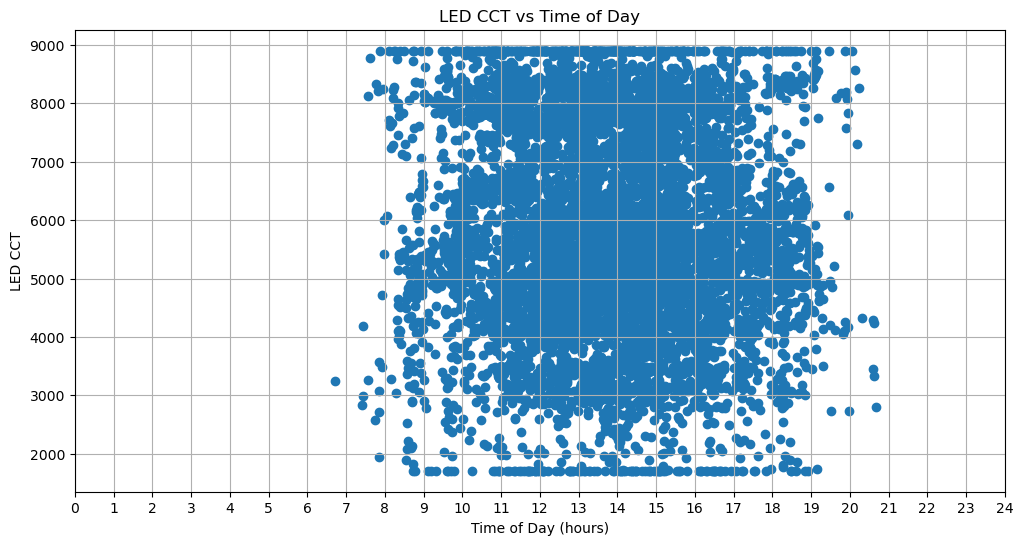

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(light['timeofday'], light['CCT_estimated'])
plt.title('LED CCT vs Time of Day')
plt.xlabel('Time of Day (hours)')
plt.ylabel('LED CCT')
plt.xticks(range(0, 25))
plt.grid(True)
plt.show()

In [30]:
print(light['PhotopicLux'])

356        54075.810546
362        34960.619901
365        25948.632163
368        26348.641201
391        28644.996086
               ...     
1191069    21399.367304
1205520    23108.735466
1205527    95165.793003
1205528    71007.344454
1205529    36238.396750
Name: PhotopicLux, Length: 9928, dtype: float64


In [31]:
print(light['PhotopicLux'].describe())

count      9928.000000
mean      52561.507878
std       29650.623283
min       20000.100720
25%       28732.438019
50%       43360.447760
75%       69853.784114
max      164339.239726
Name: PhotopicLux, dtype: float64


In [32]:
light.head(2)

,id,datatime,SconeopicEDI,MelanopicEDI,RodopicEDI,MconeopicEDI,LconeopicEDI,PhotopicLux,timeofday,mel_ratio,CCT_estimated
356,1,2022-02-21 15:31:00,27926.025642,43881.563165,48434.005083,45744.219834,52134.093330,54075.810546,15.517,0.811482,4854.061315
362,1,2022-02-21 15:34:00,18501.240930,28838.500261,30270.568250,29052.457214,31886.234236,34960.619901,15.567,0.824885,4933.840872


In [33]:
kss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1799 non-null   int64  
 1   datatime   1799 non-null   object 
 2   timeofday  1799 non-null   float64
 3   timeawake  1781 non-null   float64
 4   kss        1799 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 70.4+ KB


In [34]:
kss['datatime'] = pd.to_datetime(light['datatime'])

In [35]:
kss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1799 non-null   int64         
 1   datatime   10 non-null     datetime64[ns]
 2   timeofday  1799 non-null   float64       
 3   timeawake  1781 non-null   float64       
 4   kss        1799 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 70.4 KB


In [36]:
kss.head(20)

,id,datatime,timeofday,timeawake,kss
0,1,NaT,12.717,5.217,3
1,1,NaT,12.750,5.250,3
2,1,NaT,14.133,6.633,4
3,1,NaT,15.317,7.817,5
4,1,NaT,17.100,9.600,6
5,1,NaT,23.167,15.667,8
6,1,NaT,7.875,0.375,9
7,1,NaT,10.742,3.242,4
8,1,NaT,18.275,10.775,3
9,1,NaT,19.383,11.883,5
